In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep

from utils import *
from plotting import *

import matplotlib as mpl
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
plt.rc('font', size=16)
mpl.rc('text', usetex=False)

#plt.style.use(hep.style.CMS)
%matplotlib inline

import ROOT
from ROOT import gDirectory
from ROOT import TString

Welcome to JupyROOT 6.28/00


In [2]:
# import os
# os.listdir("/eos/user/a/aperego/SampleProduction/ParticleGunPionRelease")

In [15]:
#filename = 'root_files/histo_2Pions_vertex_100_etl.root'
#filename = 'root_files/histo_2PionsVertex_betamtd.root'
new = '/eos/user/a/aperego/SampleProduction/ParticleGunPionPU200Release/SinglePionPU200Release.root'
newTiming = '/eos/user/a/aperego/SampleProduction/ParticleGunPionPU200Release/SinglePionPU200Timing.root'

templateFile = ROOT.TFile.Open(new) # assuming all files have same structure
templateFileTiming = ROOT.TFile.Open(newTiming) # assuming all files have same structure
file = uproot.open(new)
EleIso = file['DQMData;1/Run 1;1/HGCAL;1/Run summary;1/HGCalValidator;1/ticlTrackstersMerge;1/TSToCP_linking;1']
keys = EleIso.keys()
iso_keys = []
for k in keys:
    iso_keys.append(k.replace(";1",""))
iso_keys

['Denom_CaloParticle_Energy',
 'Denom_CaloParticle_Eta',
 'Denom_CaloParticle_Phi',
 'Denom_CaloParticle_Pt',
 'Denom_Trackster_Energy_Link',
 'Denom_Trackster_Eta_Link',
 'Denom_Trackster_Phi_Link',
 'Denom_Trackster_Pt_Link',
 'Energy_vs_Score_caloparticle2Trackster',
 'Energy_vs_Score_caloparticle2bestTrackster',
 'Energy_vs_Score_caloparticle2secBestTrackster',
 'Energy_vs_Score_trackster2CaloParticle',
 'Energy_vs_Score_trackster2bestCaloParticle',
 'Energy_vs_Score_trackster2secBestCaloParticle',
 'NumDup_Trackster_Energy_Link',
 'NumDup_Trackster_Eta_Link',
 'NumDup_Trackster_Phi_Link',
 'NumDup_Trackster_Pt_Link',
 'NumEff_CaloParticle_Energy',
 'NumEff_CaloParticle_Eta',
 'NumEff_CaloParticle_Phi',
 'NumEff_CaloParticle_Pt',
 'NumMerge_Trackster_Energy_Link',
 'NumMerge_Trackster_Eta_Link',
 'NumMerge_Trackster_Phi_Link',
 'NumMerge_Trackster_Pt_Link',
 'Num_CaloParticle_Energy',
 'Num_CaloParticle_Eta',
 'Num_CaloParticle_Phi',
 'Num_CaloParticle_Pt',
 'Num_Trackster_Energy_L

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied



In [20]:
dqmfolder = "DQMData/Run 1/HGCAL/Run summary/HGCalValidator/ticlTrackstersMerge/TSToCP_linking/"
eff_pt = templateFile.Get("DQMData/Run 1/HGCAL/Run summary/HGCalValidator/ticlTrackstersMerge/TSToCP_linking/"+"effic_pt_Link")
den_pt = templateFile.Get("DQMData/Run 1/HGCAL/Run summary/HGCalValidator/ticlTrackstersMerge/TSToCP_linking/"+"Denom_Trackster_Pt_Link")

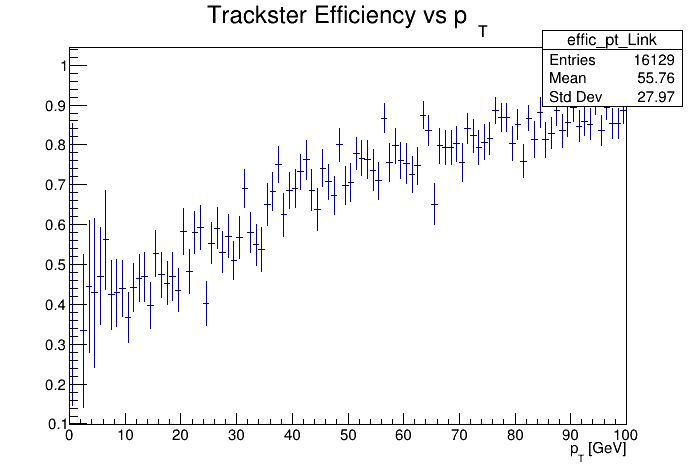

In [21]:
c = ROOT.TCanvas()
eff_pt.Draw()
eff2 = eff_pt.Rebin(5,"eff2")
c.Draw()

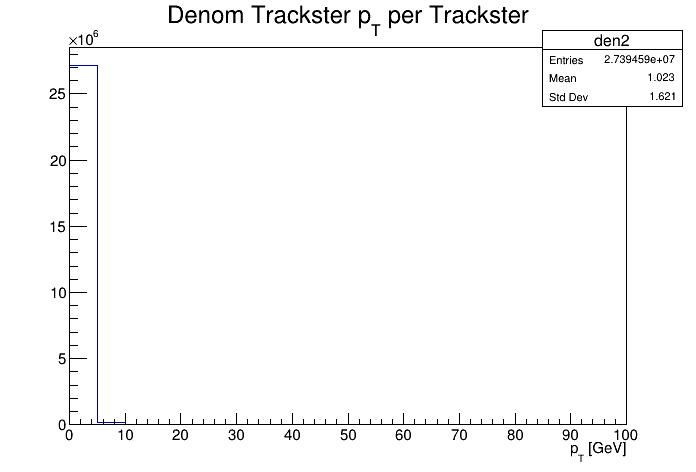

In [22]:
den2 = den_pt.Rebin(5,"den2");
den2.Draw()
c.Draw()

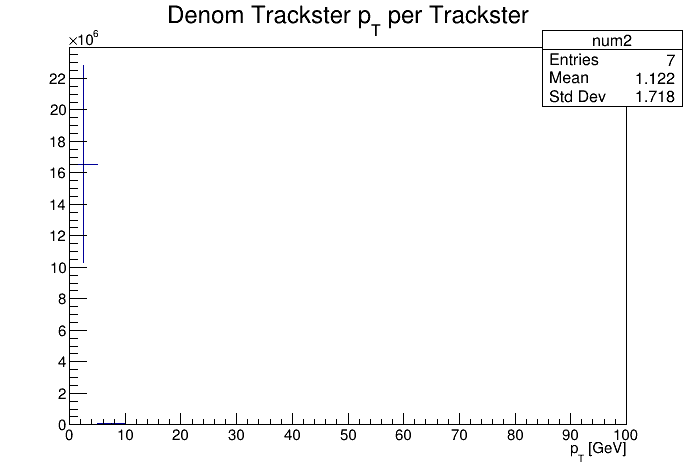

In [23]:
num = den_pt.Clone()
num.Multiply(eff_pt, den_pt)
num2 = num.Rebin(5,"num2");
num2.Draw()
c.Draw()

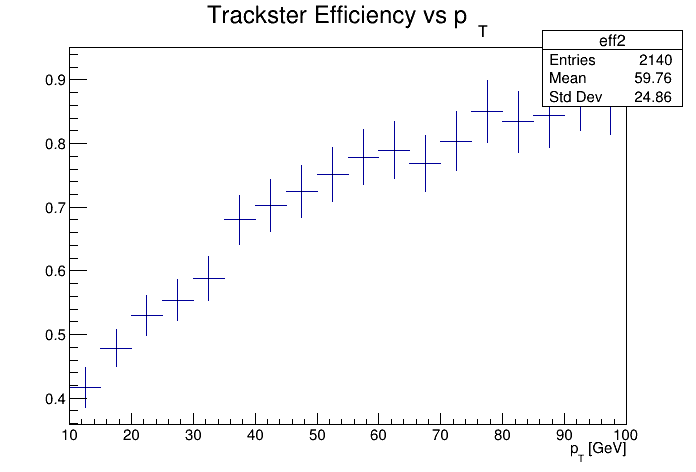

In [24]:
eff_new = eff2.Clone();
eff_new.Divide(num2,den2);
eff_new.Draw()
eff_new.GetXaxis().SetRangeUser(10,100)
c.Draw()

In [25]:
ratio_errors = num2.GetBinContent(1)/den2.GetBinContent(1) * np.sqrt(((num2.GetBinContent(1))**0.5 / num2.GetBinContent(1))**2 + ((den2.GetBinContent(1))**0.5 / den2.GetBinContent(1))**2)

In [33]:
from ROOT import TRatioPlot

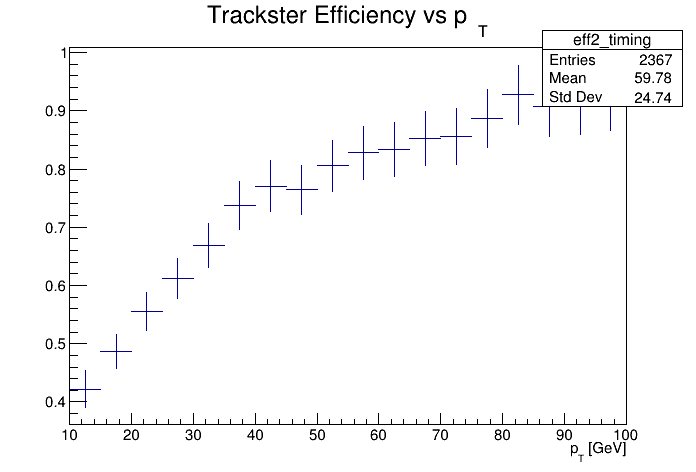

In [26]:
dqmfolder = "DQMData/Run 1/HGCAL/Run summary/HGCalValidator/ticlTrackstersMerge/TSToCP_linking/"
eff_pt_timing = templateFileTiming.Get("DQMData/Run 1/HGCAL/Run summary/HGCalValidator/ticlTrackstersMerge/TSToCP_linking/"+"effic_pt_Link")
den_pt_timing = templateFileTiming.Get("DQMData/Run 1/HGCAL/Run summary/HGCalValidator/ticlTrackstersMerge/TSToCP_linking/"+"Denom_Trackster_Pt_Link")

eff2_timing = eff_pt_timing.Rebin(5,"eff2_timing")
den2_timing = den_pt_timing.Rebin(5,"den2_timing")
num_timing = den_pt_timing.Clone()
num_timing.Multiply(eff_pt_timing, den_pt_timing)
num2_timing = num_timing.Rebin(5,"num2_timing")
eff_new_timing = eff2_timing.Clone()
eff_new_timing.Divide(num2_timing,den2_timing)
eff_new_timing.Draw()
eff_new_timing.GetXaxis().SetRangeUser(10,100)
c.Draw()

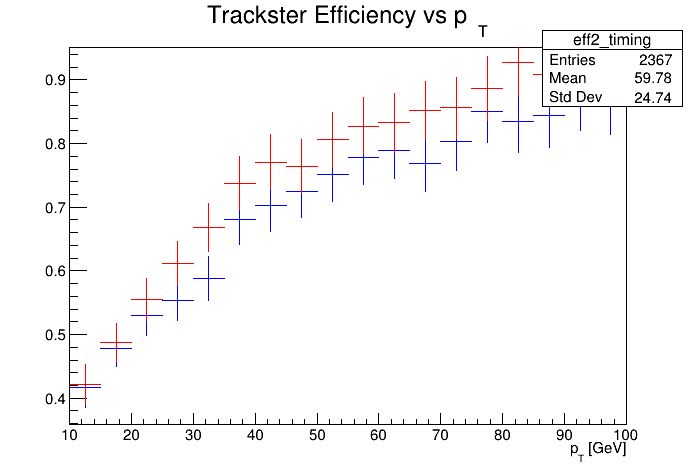

In [31]:
eff_new.SetLineColor(4)
eff_new.Draw()
eff_new_timing.SetLineColor(2)
eff_new_timing.Draw("same")
c.Draw()

In [ ]:
rp = TRatioPlot(eff_new_timing, eff_new)
c.SetTicks(0, 1)
rp.Draw()
c.Draw()

In [54]:
#BTL_keys = ['BtlCluEnergy', 'BtlCluEnergyRes', 'BtlCluEnergyVsEta', 'BtlCluEta', 'BtlCluHitNumber', 'BtlCluHitsVsEta', 'BtlCluLocalXPull', 
#            'BtlCluLocalXRes', 'BtlCluLocalYPullZGlobMinus', 'BtlCluLocalYPullZGlobPlus', 'BtlCluLocalYResZGlobMinus', 'BtlCluLocalYResZGlobPlus', 
#            'BtlCluPhi', 'BtlCluPhiRes', 'BtlCluRhoRes', 'BtlCluTPullvsE', 'BtlCluTPullvsEta', 'BtlCluTResvsE', 'BtlCluTResvsEta', 'BtlCluTime', 
#            'BtlCluTimeError', 'BtlCluTimeRes', 'BtlCluXLocalErr', 'BtlCluYLocalErr', 'BtlCluZPull', 'BtlCluZRes', 'BtlEnergyRelResvsE', 'BtlEnergyRes',
#            'BtlNclusters', 'BtlNevents', 'BtlNhits', 'BtlOccupancy', 'BtlTPullvsE', 'BtlTPullvsEta', 'BtlTimeRes', 'BtlTimeResvsE', 
#            'BtlUnmatchedCluEnergy']
#ETL_keys = ['EtlCluEnergyResZneg', 'EtlCluEnergyResZpos', 'EtlCluEnergyZnegD1', 'EtlCluEnergyZnegD2', 'EtlCluEnergyZposD1', 'EtlCluEnergyZposD2', 
#            'EtlCluEtaZnegD1', 'EtlCluEtaZnegD2', 'EtlCluEtaZposD1', 'EtlCluEtaZposD2', 'EtlCluHitNumberZnegD1', 'EtlCluHitNumberZnegD2', 
#            'EtlCluHitNumberZposD1', 'EtlCluHitNumberZposD2', 'EtlCluPhiZnegD1', 'EtlCluPhiZnegD2', 'EtlCluPhiZposD1', 'EtlCluPhiZposD2', 
#            'EtlCluTPullvsEZneg', 'EtlCluTPullvsEZpos', 'EtlCluTPullvsEtaZneg', 'EtlCluTPullvsEtaZpos', 'EtlCluTimeErrorZnegD2', 'EtlCluTimeErrorZposD1', 
#            'EtlCluTimeErrorZposD2', 'EtlCluTimeErrosZnegD1', 'EtlCluTimeResZneg', 'EtlCluTimeResZpos', 'EtlCluTimeZnegD1', 'EtlCluTimeZnegD2', 
#            'EtlCluTimeZposD1', 'EtlCluTimeZposD2', 'EtlCluXLocalErrNeg', 'EtlCluXLocalErrPos', 'EtlCluXPullZneg', 'EtlCluXPullZpos', 'EtlCluXResZneg', 
#            'EtlCluXResZpos', 'EtlCluYLocalErrNeg', 'EtlCluYLocalErrPos', 'EtlCluYPullZneg', 'EtlCluYPullZpos', 'EtlCluYResZneg', 'EtlCluYResZpos', 
#            'EtlCluZResZneg', 'EtlCluZResZpos', 'EtlEnergyRes', 'EtlTPullvsE', 'EtlTPullvsEta', 'EtlTimeRes', 
#            'EtlUnmatchedCluEnergyNeg', 'EtlUnmatchedCluEnergyPos']

In [55]:
# pt_tot = EleIso["Ele_pT_tot_Sig_EB"].to_numpy()
# pt_noMTD = EleIso["Ele_pT_noMTD_Sig_EB"].to_numpy()
# pt_MTD7 = EleIso["Ele_pT_MTD_7_Sig_EB"].to_numpy()
# pt_MTD1 = EleIso["Ele_pT_MTD_1_Sig_EB"].to_numpy()

In [56]:
eff = EleIso["effic_pt_Link"].to_numpy()
eff_num = EleIso["NumMerge_Trackster_Pt_Link"].to_numpy()
eff_den = EleIso["Denom_Trackster_Pt_Link"].to_numpy()

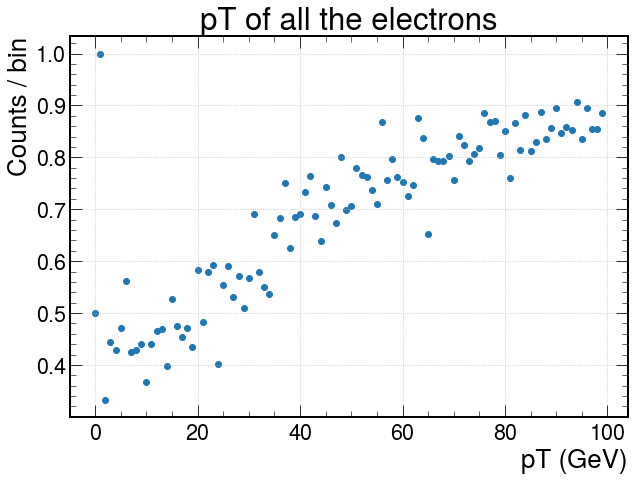

In [57]:
plt.style.use(hep.style.CMS)
plt.figure(figsize=(10,7))
plt.scatter(eff[1][:-1], eff[0])
#pt_tot.to_hist().plot(linewidth=1)
plt.title("pT of all the electrons")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.show()

In [32]:
ratio = np.array(eff_num[0]) / np.array(eff_den[0])

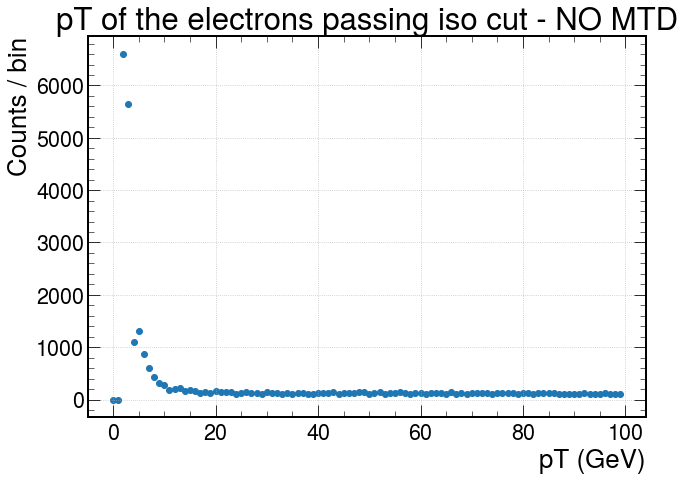

In [47]:
plt.style.use(hep.style.CMS)
plt.figure(figsize=(10,7))
plt.scatter(eff_den[1][:-1], np.array(eff_den[0])*np.array(eff[0]))
#pt_tot.to_hist().plot(linewidth=1)
plt.title("pT of the electrons passing iso cut - NO MTD")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.show()

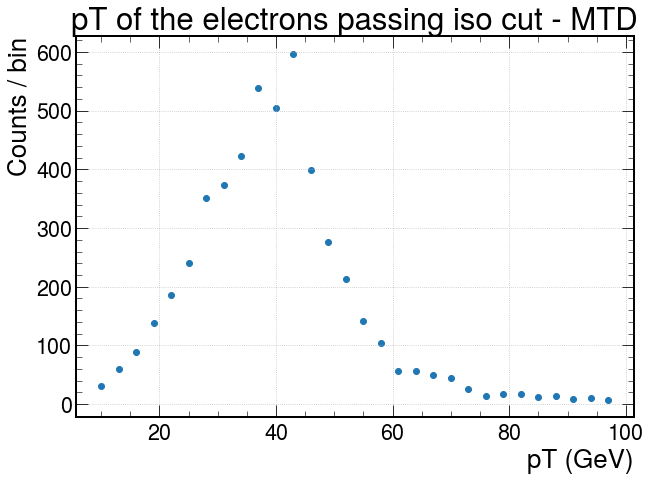

In [60]:
data = pt_MTD7
plt.style.use(hep.style.CMS)
plt.figure(figsize=(10,7))
plt.scatter(data[1][:-1], data[0])
#pt_tot.to_hist().plot(linewidth=1)
plt.title("pT of the electrons passing iso cut - MTD")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.show()

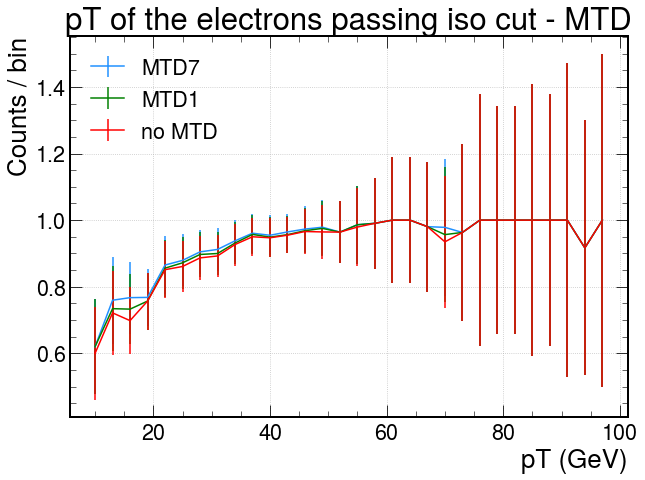

In [64]:
MTD = pt_MTD7[0] / pt_tot[0]
MTD1 = pt_MTD1[0] / pt_tot[0]
noMTD = pt_noMTD[0] / pt_tot[0]
err_MTD = np.sqrt( pt_MTD7[0] / (pt_tot[0]*pt_tot[0]) + pt_MTD7[0]**2 / (pt_tot[0]**3) )
err_MTD1 = np.sqrt( pt_MTD1[0] / (pt_tot[0]*pt_tot[0]) + pt_MTD1[0]**2 / (pt_tot[0]**3) )
err_noMTD = np.sqrt( pt_noMTD[0] / (pt_tot[0]*pt_tot[0]) + pt_noMTD[0]**2 / (pt_tot[0]**3) )

plt.style.use(hep.style.CMS)
plt.figure(figsize=(10,7))
#plt.scatter(data[1][:-1], MTD, c="dodgerblue")
#plt.scatter(data[1][:-1], noMTD, c="red")
plt.errorbar(data[1][:-1], MTD, err_MTD, c="dodgerblue", label ="MTD7")
plt.errorbar(data[1][:-1], MTD1, err_MTD1, c="green", label ="MTD1")
plt.errorbar(data[1][:-1], noMTD, err_noMTD, c="red", label ="no MTD")
#pt_tot.to_hist().plot(linewidth=1)
plt.title("efficiency - MTD")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend(loc="upper left")
plt.show()

/tmp/ipykernel_603/4037620518.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(data[1][:-1], MTD, err_MTD, c="dodgerblue", label ="MTD7",  fmt = "o-", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
/tmp/ipykernel_603/4037620518.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(data[1][:-1], MTD1, err_MTD1, c="green", label ="MTD1",  fmt = "^-", markersize=5, mfc="green", mec="green", ecolor="green", capsize=5, linestyle='')
/tmp/ipykernel_603/4037620518.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(data[1][:-1], noMTD, e

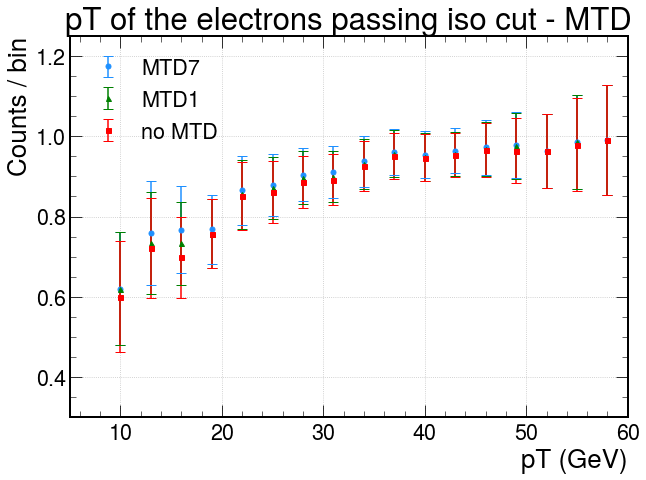

In [65]:
plt.style.use(hep.style.CMS)
plt.figure(figsize=(10,7))
#plt.scatter(data[1][:-1], MTD, c="dodgerblue")
#plt.scatter(data[1][:-1], noMTD, c="red")
plt.errorbar(data[1][:-1], MTD, err_MTD, c="dodgerblue", label ="MTD7",  fmt = "o-", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(data[1][:-1], MTD1, err_MTD1, c="green", label ="MTD1",  fmt = "^-", markersize=5, mfc="green", mec="green", ecolor="green", capsize=5, linestyle='')
plt.errorbar(data[1][:-1], noMTD, err_noMTD, c="red", label ="no MTD",  fmt = "s-", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
#pt_tot.to_hist().plot(linewidth=1)
plt.title("pT of the electrons passing iso cut - MTD")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend(loc="upper left")
plt.xlim(5, 60)
plt.ylim(0.3,1.25)
plt.show()